# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [8]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [9]:
df_data.shape

(962, 16)

In [11]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [12]:
df_data.sort_values('year')

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
951  2020   Chemistry               The Nobel Prize in Chemistry 2020   
950  2020   Chemistry               The Nobel Prize in Chemistry 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
954  2020  Literature              The Nobel Prize in Literature 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
951  “for the development of a method for genome ed...         1/2   
950  “for the development of a method for genome ed...         1/2   
960  “for the discovery of a supermassive compact o...         1/4   
954  “for her unmistakable poetic voice that with a...         1/1   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
951    Individual            Jennifer A. Doudna  1964-02-19   
950    Individual        Emmanuelle Charpentier  1968-12-11   
960    Individual               Reinhard Genzel  1952-03-24   
954    Individual                  Louise Glück  1943-04-22   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
951            Washington, DC  United States of America   
950           Juvisy-sur-Orge                    France   
960  Bad Homburg vor der Höhe                   Germany   
954              New York, NY  United States of America   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
951  United States of America  Female  University of California   
950                    France  Female       Max-Planck-Institut   
960                   Germany    Male  University of California   
954  United States of America  Female                       NaN   
961            United Kingdom    Male      University of Oxford   

    organization

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [13]:
df_data.duplicated().values.any()

False

In [14]:
df_data.isna().values.any()

True

### Check for NaN Values

In [25]:
for col in df_data.columns:
    print(f"{col}: {df_data[col].isna().values.any()}")

year: False
category: False
prize: False
motivation: True
prize_share: False
laureate_type: False
full_name: False
birth_date: True
birth_city: True
birth_country: True
birth_country_current: True
sex: True
organization_name: True
organization_city: True
organization_country: True
ISO: True


In [28]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [29]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaT   
60   1910    Peace  Organization        NaT   
89   1917    Peace  Organization        NaT   
200  1938    Peace  Organization        NaT   
215  1944    Peace  Organization        NaT   
237  1947    Peace  Organization        NaT   
238  1947    Peace  Organization        NaT   
283  1954    Peace  Organization        NaT   
348  1963    Peace  Organization        NaT   
349  1963    Peace  Organization        NaT   
366  1965    Peace  Organization        NaT   
399  1969    Peace  Organization        NaT   
479  1977    Peace  Organization        NaT   
523  1981    Peace  Organization        NaT   
558  1985    Peace  Organization        NaT   
588  1988    Peace  Organization        NaT   
659  1995    Peace  Organization        NaT   
682  1997    Peace  Organization        NaT   
703  1999    Peace  Organization        NaT   
730  2001    Peace  Organization        NaT   
778  2005    Peace  Organization        NaT   
788  2006    Peace  Organization        NaT   
801  2007    Peace  Organization        NaT   
860  2012    Peace  Organization        NaT   
873  2013    Peace  Organization        NaT   
897  2015    Peace  Organization        NaT   
919  2017    Peace  Organization        NaT   
958  2020    Peace  Organization        NaT   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [26]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [30]:
check_for_shared = df_data.prize_share.str.split("/", expand=True)
numerator = pd.to_numeric(check_for_shared[0])
denomenator = pd.to_numeric(check_for_shared[1])
df_data['share_pct'] = numerator / denomenator

In [31]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

In [120]:
check_for_shared = df_data.prize_share.str.split("/", expand=True)
df_data['shared'] = pd.to_numeric(check_for_shared[1])
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  shared  
0            Berlin              Germany  NLD       1.00       1  
1               NaN                  NaN  FRA       1.00       1  
2           Marburg              Germany  POL       1.00       1  
3               NaN                  NaN  FRA       0.50       2  
4               NaN                  NaN  CHE       0.50       2

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [33]:
biology = df_data.sex.value_counts()
fig = px.pie(labels = biology.index,
        values = biology.values,
        hover_name = biology.index,
        title = "Percentage of Male vs. Female Winners",
        hole = 0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [43]:
df_data[df_data.sex == 'Female'].sort_values('year')[:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

In [45]:
female_winner = df_data[df_data.sex == 'Female'].sort_values('year')
female_winner[['prize', 'laureate_type', 'birth_country']]

prize laureate_type  \
18                     The Nobel Prize in Physics 1903    Individual   
29                          The Nobel Peace Prize 1905    Individual   
51                  The Nobel Prize in Literature 1909    Individual   
62                   The Nobel Prize in Chemistry 1911    Individual   
128                 The Nobel Prize in Literature 1926    Individual   
141                 The Nobel Prize in Literature 1928    Individual   
160                         The Nobel Peace Prize 1931    Individual   
179                  The Nobel Prize in Chemistry 1935    Individual   
198                 The Nobel Prize in Literature 1938    Individual   
218                 The Nobel Prize in Literature 1945    Individual   
229                         The Nobel Peace Prize 1946    Individual   
236     The Nobel Prize in Physiology or Medicine 1947    Individual   
352                    The Nobel Prize in Physics 1963    Individual   
353                  The Nobel Prize in Chemistry 1964    Individual   
371                 The Nobel Prize in Literature 1966    Individual   
468                         The Nobel Peace Prize 1976    Individual   
469                         The Nobel Peace Prize 1976    Individual   
478     The Nobel Prize in Physiology or Medicine 1977    Individual   
501                         The Nobel Peace Prize 1979  Organization   
534                         The Nobel Peace Prize 1982    Individual   
539     The Nobel Prize in Physiology or Medicine 1983    Individual   
565     The Nobel Prize in Physiology or Medicine 1986    Individual   
586     The Nobel Prize in Physiology or Medicine 1988    Individual   
615                 The Nobel Prize in Literature 1991    Individual   
618                         The Nobel Peace Prize 1991  Organization   
625                         The Nobel Peace Prize 1992    Individual   
631                 The Nobel Prize in Literature 1993    Individual   
655     The Nobel Prize in Physiology or Medicine 1995    Individual   
667                 The Nobel Prize in Literature 1996    Individual   
683                         The Nobel Peace Prize 1997    Individual   
754                         The Nobel Peace Prize 2003    Individual   
763                 The Nobel Prize in Literature 2004    Individual   
764     The Nobel Prize in Physiology or Medicine 2004    Individual   
766                         The Nobel Peace Prize 2004    Individual   
796                 The Nobel Prize in Literature 2007    Individual   
809     The Nobel Prize in Physiology or Medicine 2008    Individual   
816                  The Nobel Prize in Chemistry 2009    Individual   
819  The Sveriges Riksbank Prize in Economic Scienc...    Individual   
821                 The Nobel Prize in Literature 2009    Individual   
822     The Nobel Prize in Physiology or Medicine 2009    Individual   
823     The Nobel Prize in Physiology or Medicine 2009    Individual   
848                         The Nobel Peace Prize 2011    Individual   
849                         The Nobel Peace Prize 2011    Individual   
847                         The Nobel Peace Prize 2011    Individual   
869                 The Nobel Prize in Literature 2013    Individual   
883     The Nobel Prize in Physiology or Medicine 2014    Individual   
885                         The Nobel Peace Prize 2014    Individual   
893                 The Nobel Prize in Literature 2015    Individual   
896     The Nobel Prize in Physiology or Medicine 2015    Individual   
923                  The Nobel Prize in Chemistry 2018    Individual   
928                 The Nobel Prize in Literature 2018    Individual   
932                         The Nobel Peace Prize 2018    Individual   
934                    The Nobel Prize in Physics 2018    Individual   
940  The Sveriges Riksbank Prize in Economic Scienc...    Individual   
954                 The Nobel Prize in Literature 2020    Individual   
950              

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [69]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
multiple_winners[['year', 'category', 'laureate_type', 'full_name']]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [63]:
df_data.category.nunique()

6

In [64]:
df_data.category.value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [65]:
prize_category = df_data.category.value_counts()
fig = px.bar(x=prize_category.index,
             y=prize_category.values,
             color = prize_category.values,
             color_continuous_scale='Aggrnyl',
             title='Number of Prizes Awarded per Category')

fig.update_layout(xaxis_title='Nobel Prize Category', 
                  coloraxis_showscale=False,
                  yaxis_title='Number of Prizes')

fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [73]:
first_econ_winner = df_data[df_data.category == 'Economics'].sort_values('year')[:1]

In [74]:
first_econ_winner['full_name']

393    Jan Tinbergen
Name: full_name, dtype: object

In [75]:
first_econ_winner['year']

393    1969
Name: year, dtype: int64

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [78]:
cat_bio = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_bio.sort_values('prize', ascending=False, inplace=True)

In [118]:
fig = px.bar(x=cat_bio.category,
             y=cat_bio.prize,
             color=cat_bio.sex,
             title='Number of Prizes Awarded per Category split by Men and Women')

fig.update_layout(xaxis_title='Nobel Prize Category', 
                  yaxis_title='Number of Prizes')

fig.show()

In [85]:
literature_women = df_data[df_data.category == 'Literature']
literature_women[literature_women.sex == 'Female']

year    category                               prize  \
51   1909  Literature  The Nobel Prize in Literature 1909   
128  1926  Literature  The Nobel Prize in Literature 1926   
141  1928  Literature  The Nobel Prize in Literature 1928   
198  1938  Literature  The Nobel Prize in Literature 1938   
218  1945  Literature  The Nobel Prize in Literature 1945   
371  1966  Literature  The Nobel Prize in Literature 1966   
615  1991  Literature  The Nobel Prize in Literature 1991   
631  1993  Literature  The Nobel Prize in Literature 1993   
667  1996  Literature  The Nobel Prize in Literature 1996   
763  2004  Literature  The Nobel Prize in Literature 2004   
796  2007  Literature  The Nobel Prize in Literature 2007   
821  2009  Literature  The Nobel Prize in Literature 2009   
869  2013  Literature  The Nobel Prize in Literature 2013   
893  2015  Literature  The Nobel Prize in Literature 2015   
928  2018  Literature  The Nobel Prize in Literature 2018   
954  2020  Literature  The Nobel Prize in Literature 2020   

                                            motivation prize_share  \
51   "in appreciation of the lofty idealism, vivid ...         1/1   
128  "for her idealistically inspired writings whic...         1/1   
141  "principally for her powerful descriptions of ...         1/1   
198  "for her rich and truly epic descriptions of p...         1/1   
218  "for her lyric poetry which, inspired by power...         1/1   
371  "for her outstanding lyrical and dramatic writ...         1/2   
615  "who through her magnificent epic writing has ...         1/1   
631  "who in novels characterized by visionary forc...         1/1   
667  "for poetry that with ironic precision allows ...         1/1   
763  "for her musical flow of voices and counter-vo...         1/1   
796  "that epicist of the female experience, who wi...         1/1   
821  "who, with the concentration of poetry and the...         1/1   
869           "master of the contemporary short story"         1/1   
893  "for her polyphonic writings, a monument to su...         1/1   
928  “for a narrative imagination that with encyclo...         1/1   
954  “for her unmistakable poetic voice that with a...         1/1   

    laureate_type                      full_name birth_date  \
51     Individual  Selma Ottilia Lovisa Lagerlöf 1858-11-20   
128    Individual                 Grazia Deledda 1871-09-27   
141    Individual                  Sigrid Undset 1882-05-20   
198    Individual                     Pearl Buck 1892-06-26   
218    Individual               Gabriela Mistral 1889-04-07   
371    Individual                    Nelly Sachs 1891-12-10   
615    Individual                Nadine Gordimer 1923-11-20   
631    Individual                  Toni Morrison 1931-02-18   
667    Individual             Wislawa Szymborska 1923-07-02   
763    Individual               Elfriede Jelinek 1946-10-20   
796    Individual                  Doris Lessing 1919-10-22   
821    Individual                   Herta Müller 1953-08-17   
869    Individual                    Alice Munro 1931-07-10   
893    Individual            Svetlana Alexievich 1948-05-31   
928    Individual                 Olga Tokarczuk 1962-01-29   
954    Individual                   Louise Glück 1943-04-22   

            birth_city             birth_country     birth_country_current  \
51            Mårbacka                    Sweden                    Sweden   
128    Nuoro, Sardinia                     Italy                     Italy   
141         Kalundborg                   Denmark                   Denmark   
198      Hillsboro, WV  United States of America  United States of America   
218             Vicuña                     Chile                     Chile   
371             Berlin                   Germany                   Germany   
615            Springs              South Africa              South Africa   
631         Lorain, OH  United States of America  United States of America   
66

In [87]:
physics_women = df_data[df_data.category == 'Physics']
physics_women[physics_women.sex == 'Female']

year category                            prize  \
18   1903  Physics  The Nobel Prize in Physics 1903   
352  1963  Physics  The Nobel Prize in Physics 1963   
934  2018  Physics  The Nobel Prize in Physics 2018   
959  2020  Physics  The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
352  "for their discoveries concerning nuclear shel...         1/4   
934  “for their method of generating high-intensity...         1/4   
959  “for the discovery of a supermassive compact o...         1/4   

    laureate_type                    full_name birth_date  \
18     Individual  Marie Curie, née Sklodowska 1867-11-07   
352    Individual         Maria Goeppert Mayer 1906-06-28   
934    Individual             Donna Strickland 1959-05-27   
959    Individual                  Andrea Ghez 1965-06-16   

               birth_city             birth_country     birth_country_current  \
18                 Warsaw   Russian Empire (Poland)                    Poland   
352  Kattowitz (Katowice)          Germany (Poland)                    Poland   
934                Guelph                    Canada                    Canada   
959          New York, NY  United States of America  United States of America   

        sex         organization_name organization_city  \
18   Female                       NaN               NaN   
352  Female  University of California     San Diego, CA   
934  Female    University of Waterloo          Waterloo   
959  Female  University of California      Berkeley, CA   

         organization_country  ISO  share_pct  
18                        NaN  POL       0.25  
352  United States of America  POL       0.25  
934                    Canada  CAN       0.25  
959  United States of America  USA       0.25

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [108]:
year_trace = df_data['year'].value_counts()

In [91]:
fig = px.scatter(x=year_trace.index,
                 y=year_trace.values)
fig.show()

In [154]:
prize_per_year = df_data.groupby(by='year').count().prize 

In [155]:
moving_average = prize_per_year.rolling(window=5).mean()

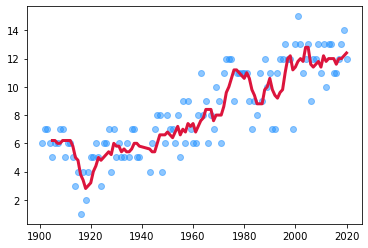

In [156]:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.5)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

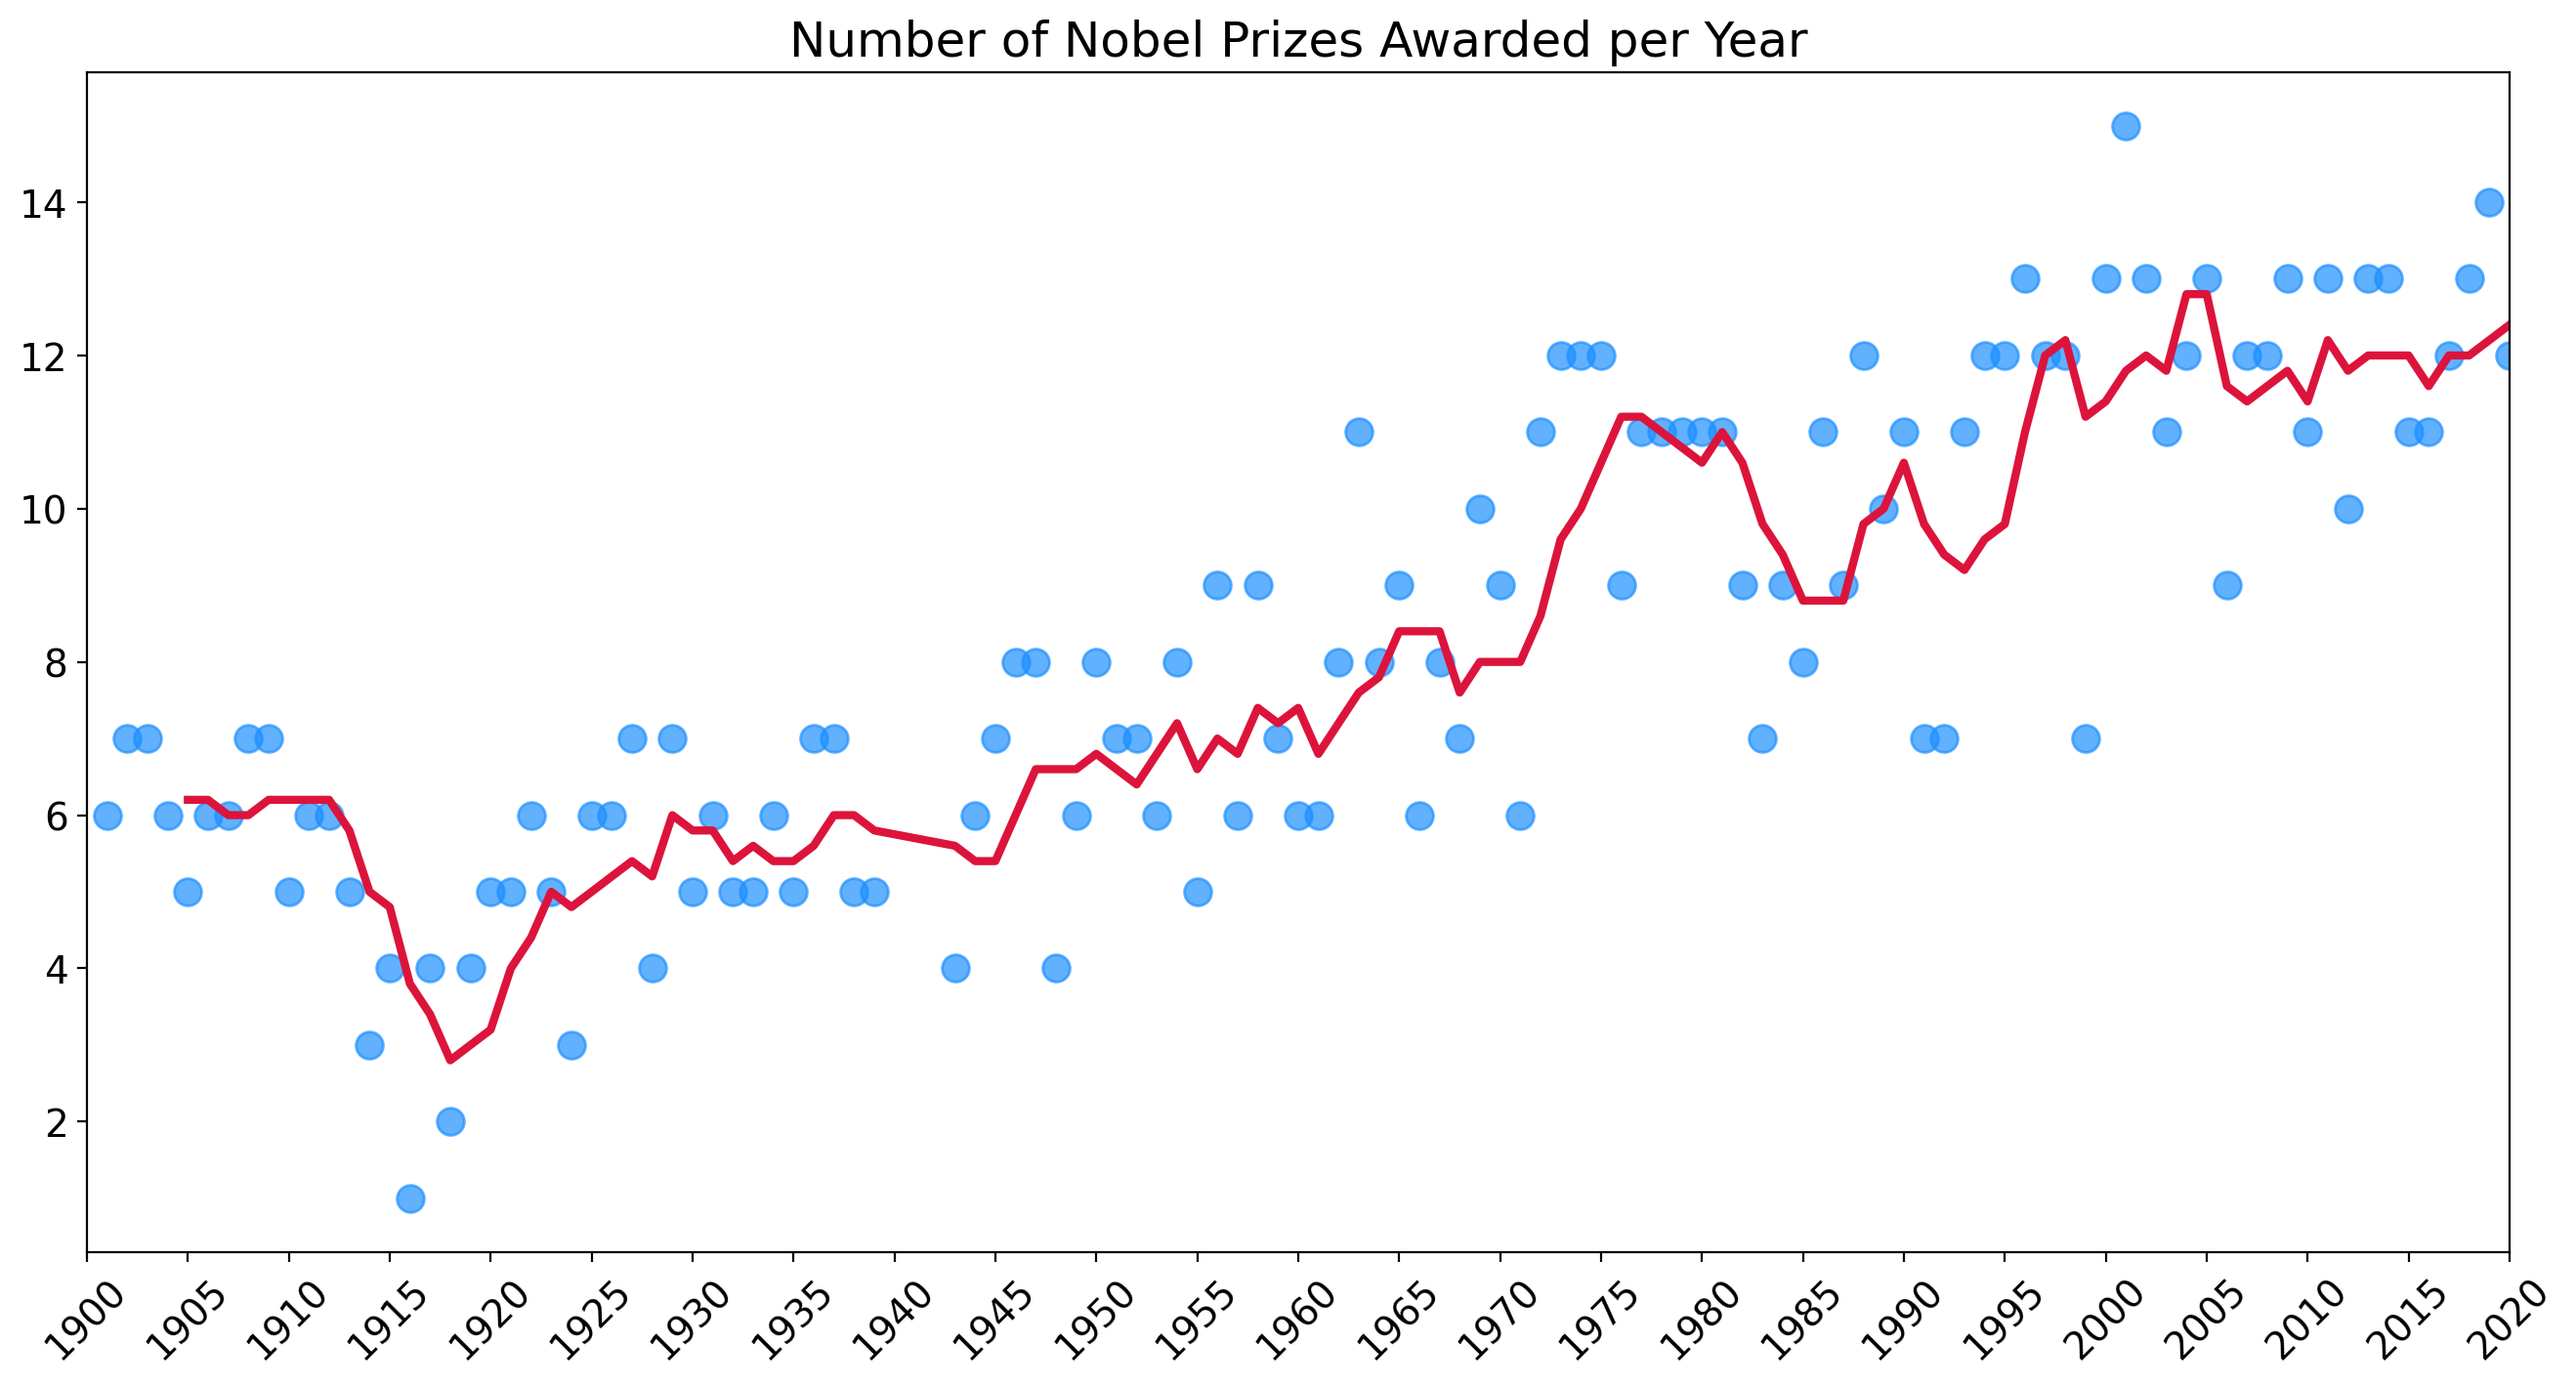

In [157]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [169]:
prize_share_per_year = df_data.groupby('year').mean().share_pct
prize_share_per_year

year
1901   0.83
1902   0.71
1903   0.71
1904   0.83
1905   1.00
       ... 
2016   0.55
2017   0.50
2018   0.46
2019   0.43
2020   0.50
Name: share_pct, Length: 117, dtype: float64

In [170]:
shared_moving_average = prize_share_per_year.rolling(window=5).mean()

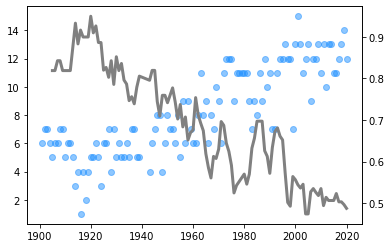

In [176]:
axis1 = plt.gca()
axis2 = axis1.twinx()

axis1.scatter(prize_per_year.index,
        prize_per_year.values,
        c='dodgerblue',
        alpha=0.5)

axis2.plot(prize_per_year.index, shared_moving_average.values, color="gray", linewidth=3)

plt.show()

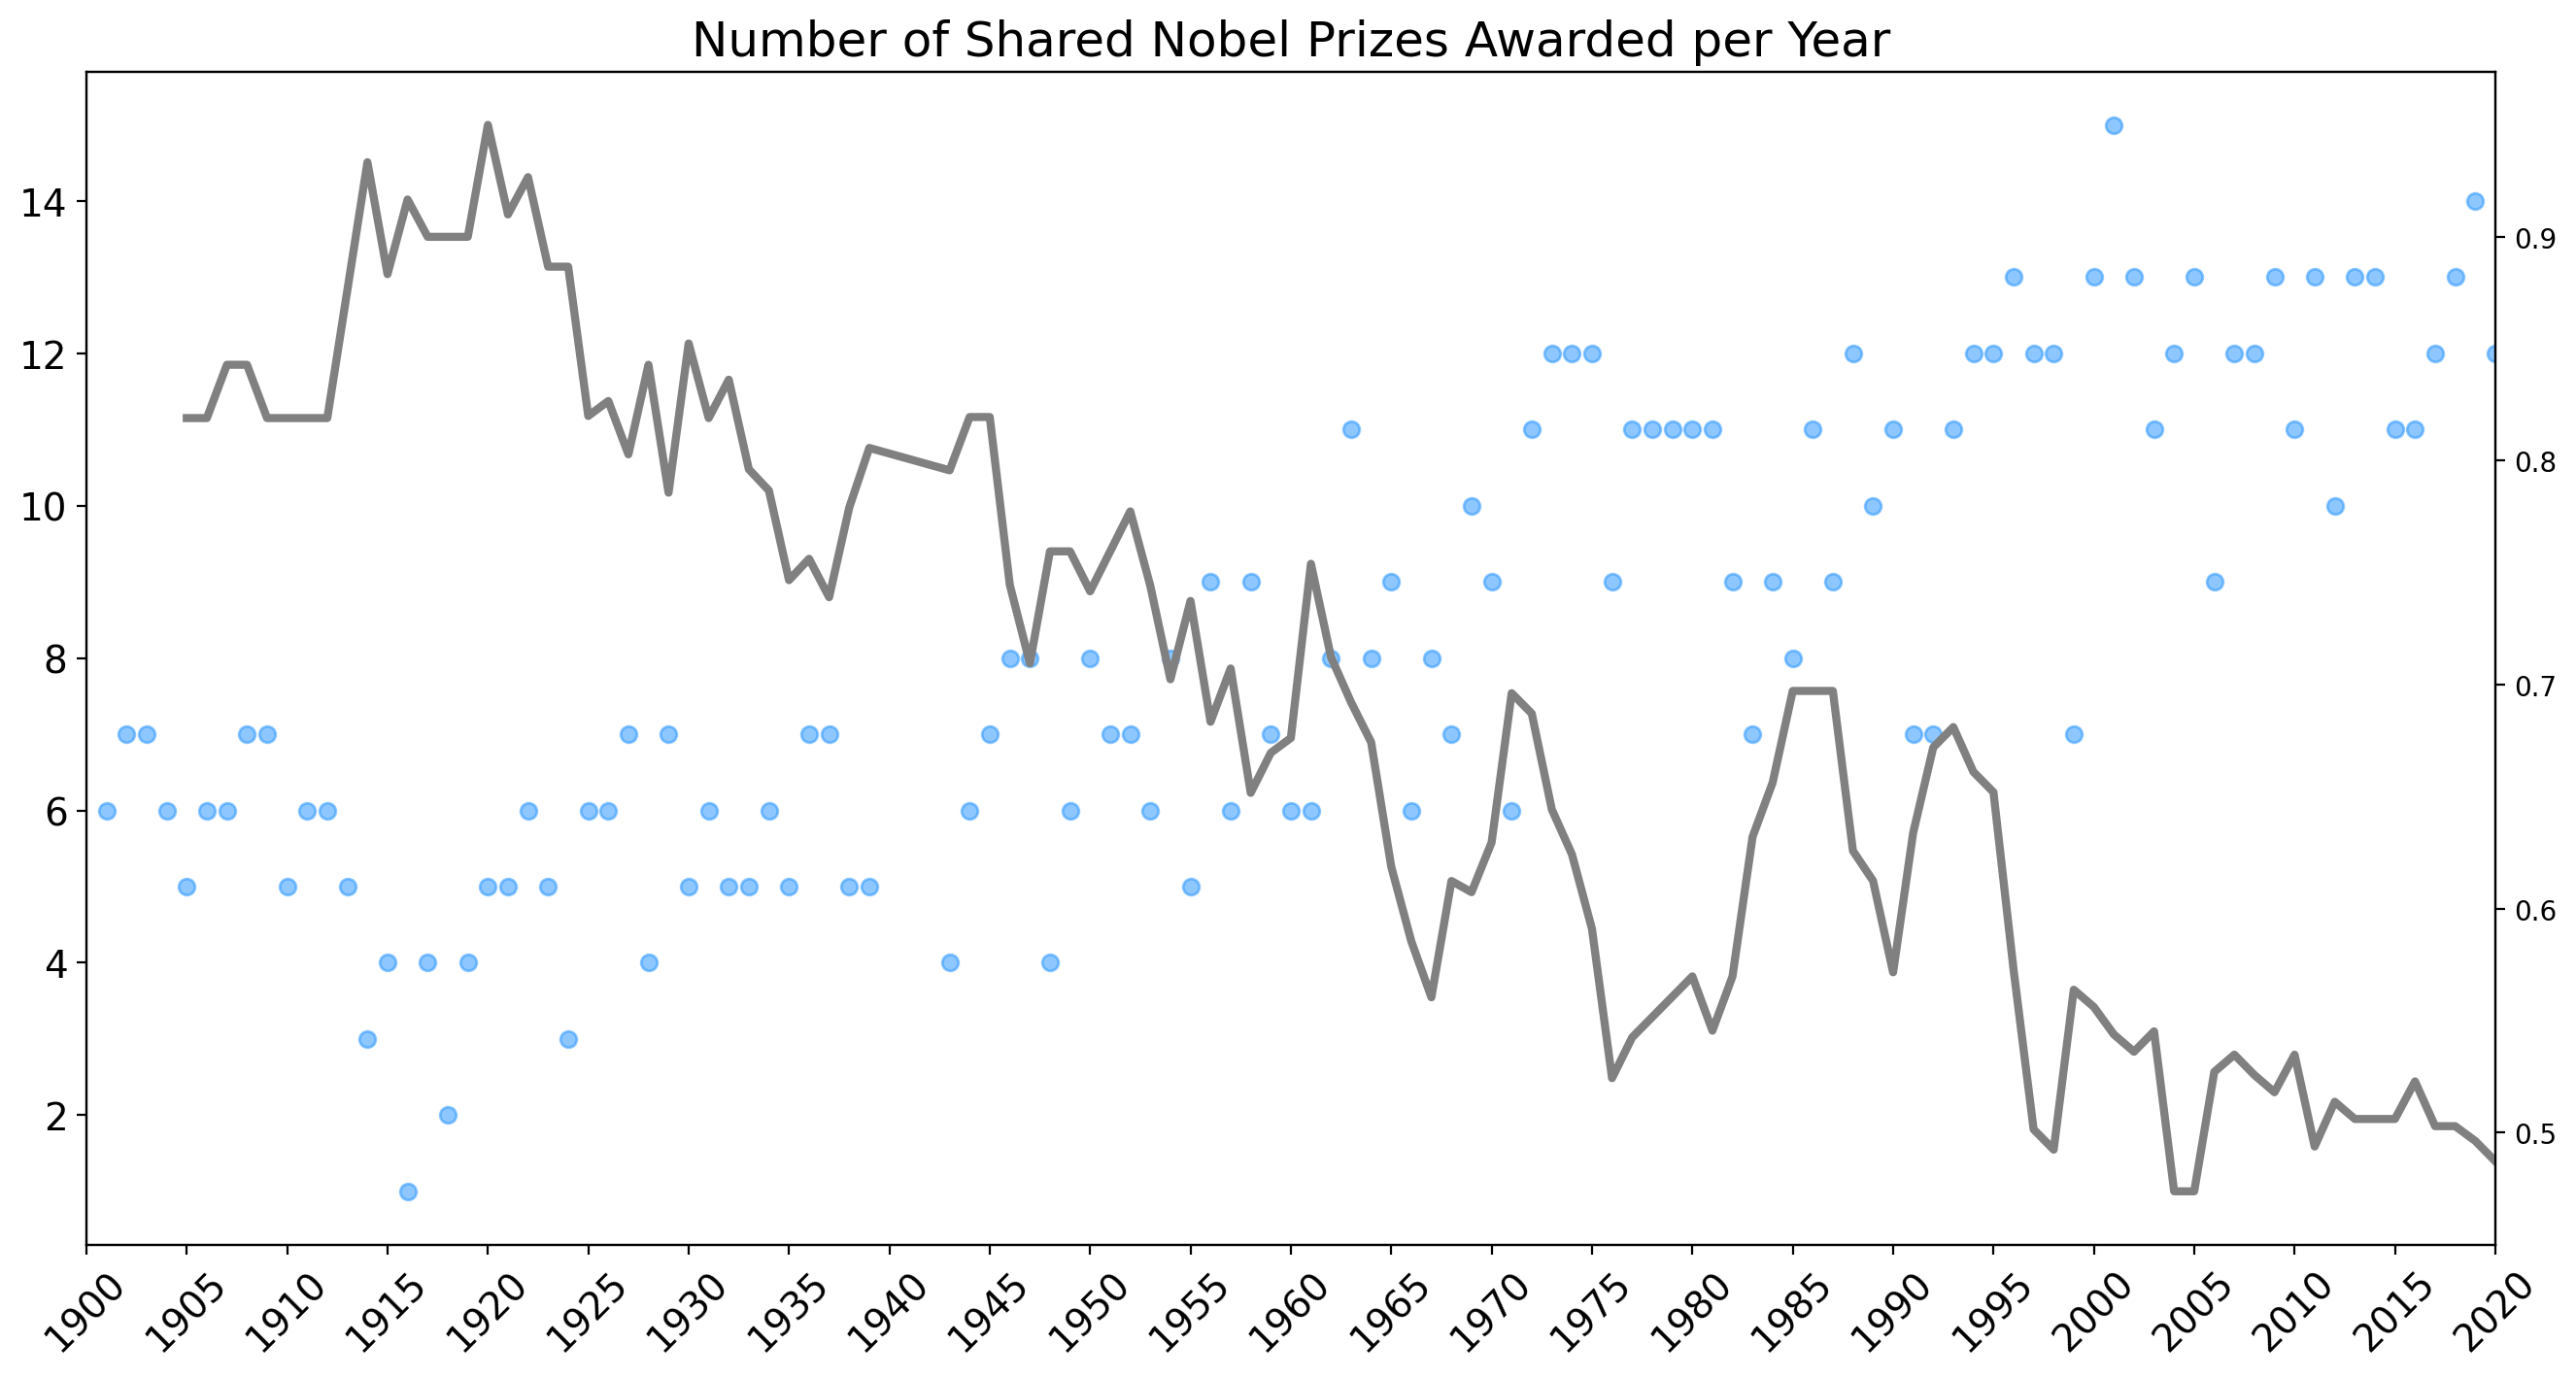

In [177]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Shared Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

axis1 = plt.gca()
axis1.set_xlim(1900, 2020)
axis2 = axis1.twinx()

axis1.scatter(prize_per_year.index,
        prize_per_year.values,
        c='dodgerblue',
        alpha=0.5)

axis2.plot(prize_per_year.index, shared_moving_average.values, color="gray", linewidth=3)

plt.show()

In [163]:
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

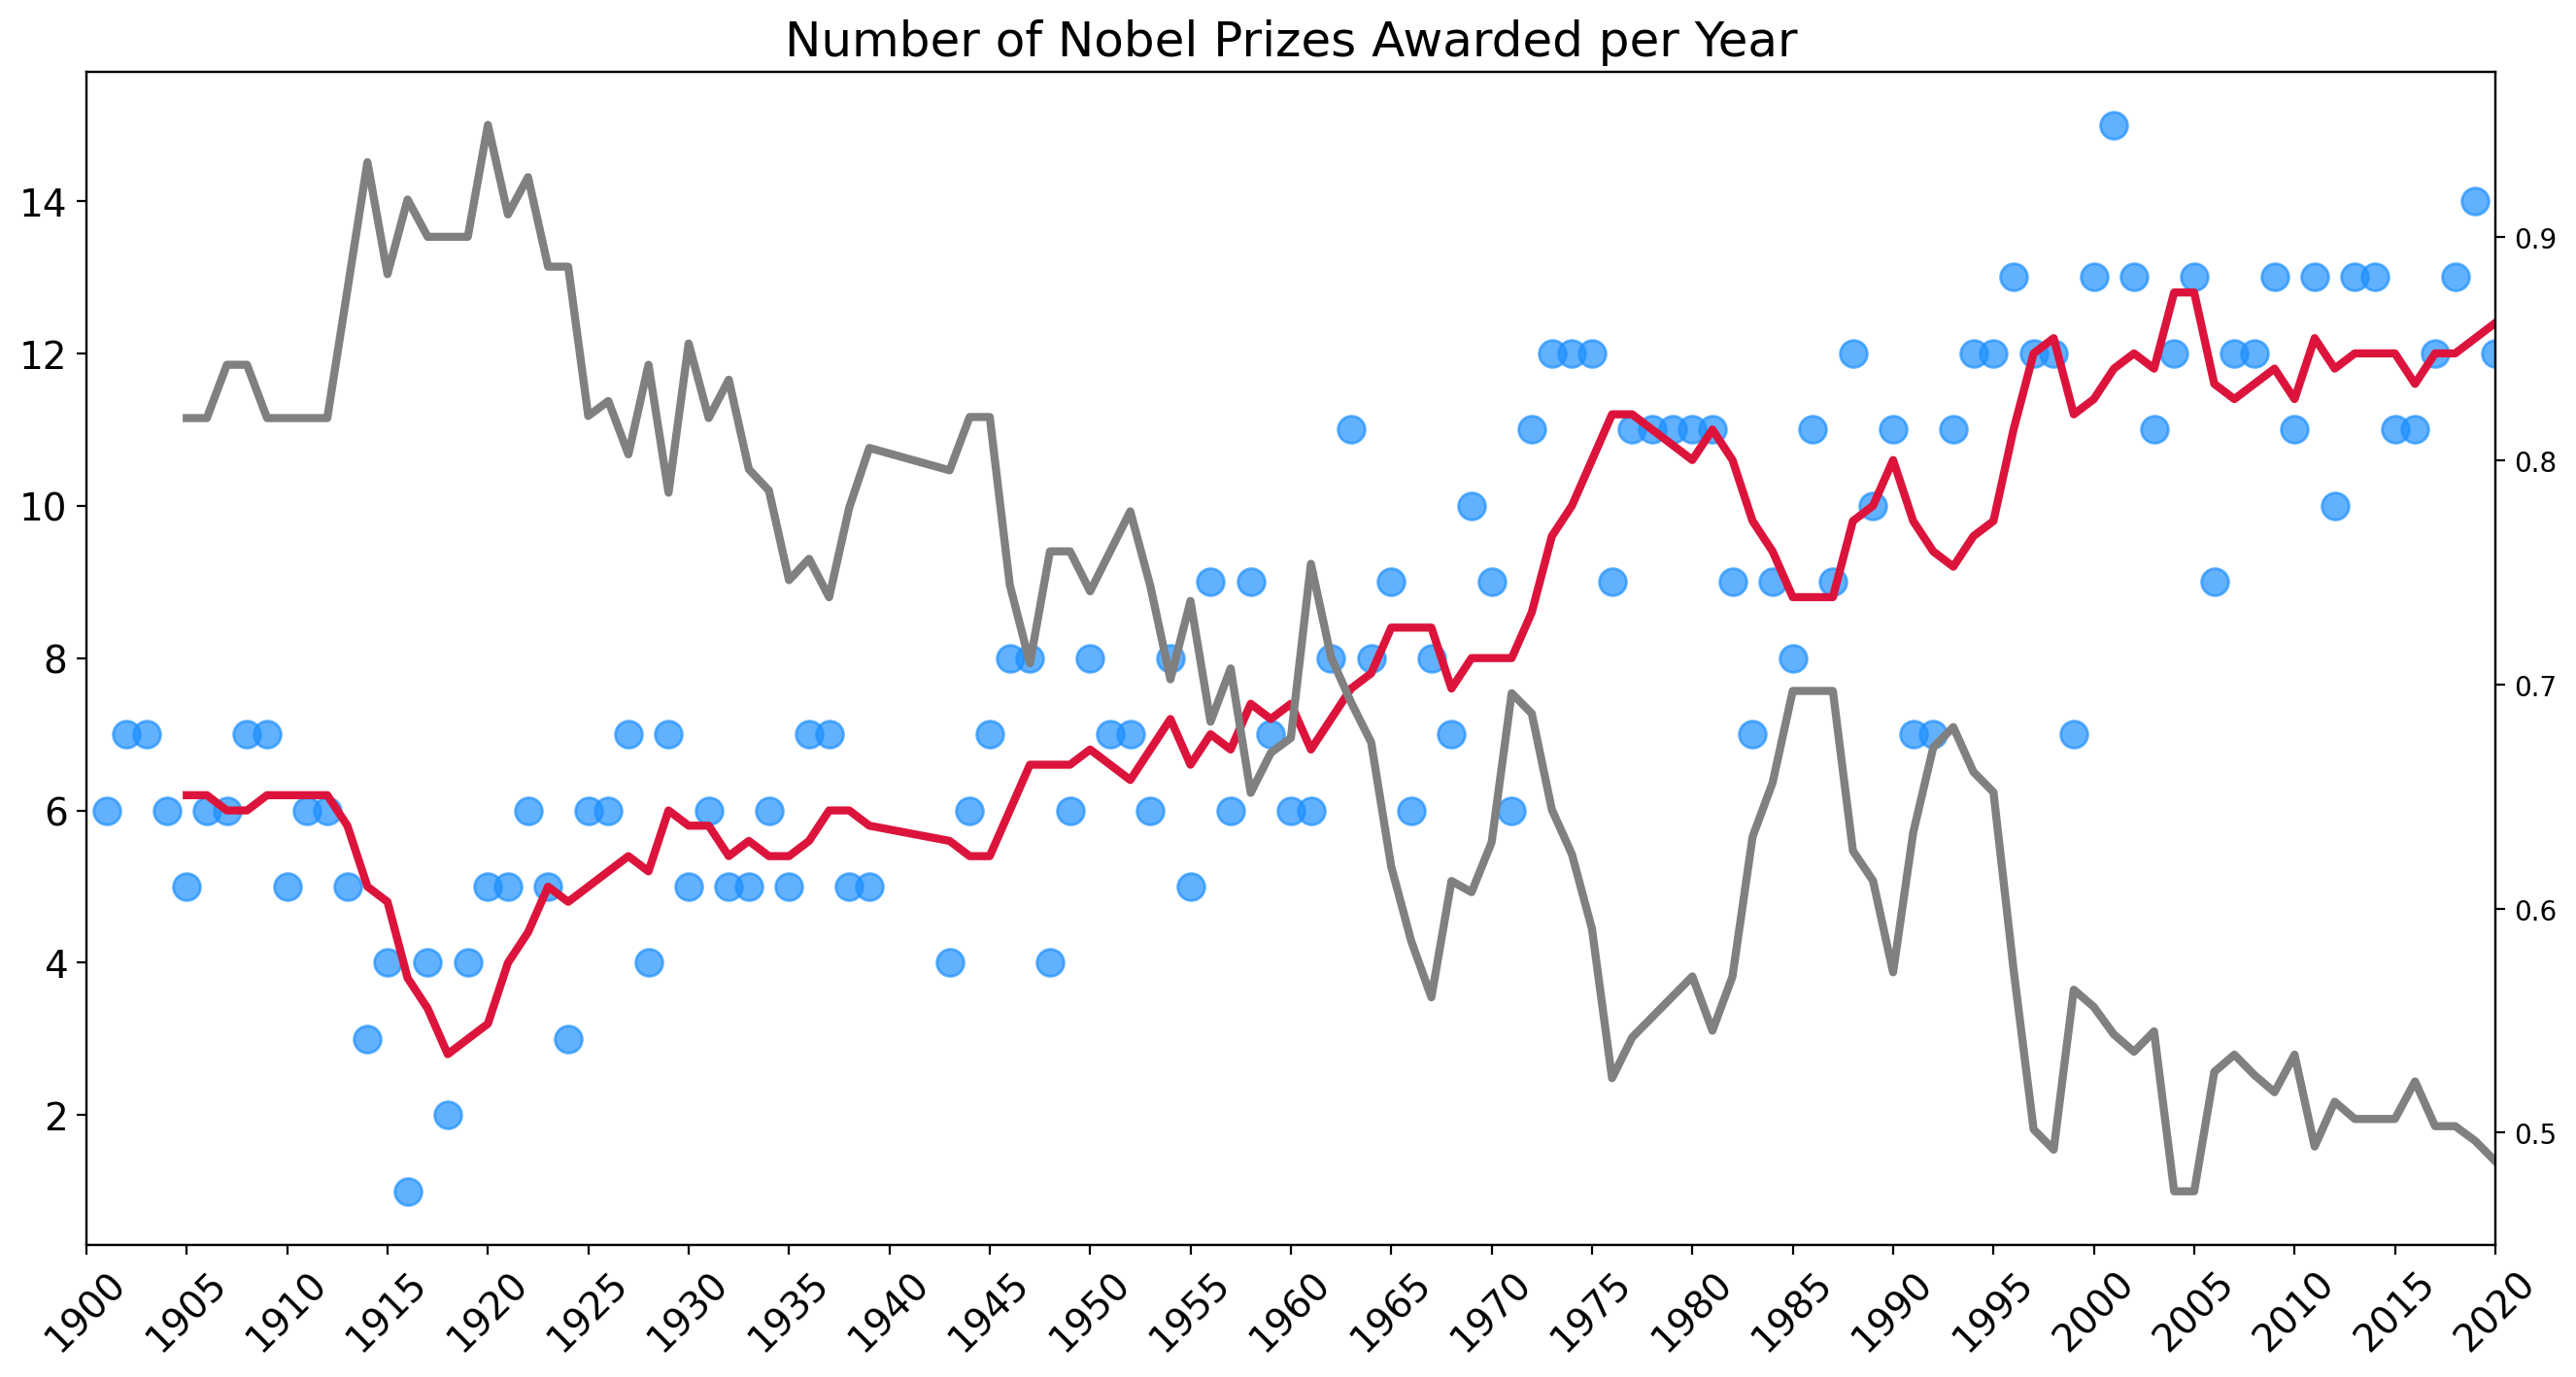

In [164]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [205]:
top_countries = df_data.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})
 
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

In [206]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [209]:
df_country = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize':pd.Series.count})
df_country.sort_values('prize', ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [211]:
world_map = px.choropleth(df_country,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [213]:
cat_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [215]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
merged_df

birth_country_current    category  prize_x  prize_y
0    United States of America    Medicine       78      281
1    United States of America     Physics       70      281
2    United States of America   Chemistry       55      281
3    United States of America   Economics       49      281
4    United States of America       Peace       19      281
..                        ...         ...      ...      ...
105                     India  Literature        2        9
106                     India    Medicine        2        9
107                     India   Chemistry        1        9
108                     India       Peace        1        9
109                     India     Physics        1        9

[110 rows x 4 columns]

In [216]:
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)

In [217]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [242]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [237]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).agg({'prize': pd.Series.count})
prize_by_year = prize_by_year.sort_values('year')
prize_by_year

birth_country_current  year  prize
118                    France  1901      2
346                    Poland  1901      1
159                   Germany  1901      1
312               Netherlands  1901      1
440               Switzerland  1901      1
..                        ...   ...    ...
31                    Austria  2019      1
221                   Germany  2020      1
622  United States of America  2020      7
533            United Kingdom  2020      2
158                    France  2020      1

[627 rows x 3 columns]

In [245]:
cumulative_prizes = prize_by_year.groupby(['birth_country_current','year']).sum().groupby(level=0).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [228]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [263]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [264]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')
 
org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [271]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
# top20_org_cities
top20_org_cities.sort_values(ascending=True, inplace=True)

In [266]:
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [275]:
top20_birth_cities = df_data.birth_city.value_counts()[:20]
top20_birth_cities.sort_values(ascending=True, inplace=True)

In [277]:
city_bar = px.bar(x=top20_birth_cities.values,
                  y=top20_birth_cities.index,
                  orientation='h',
                  color=top20_birth_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [278]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)

In [280]:
burst = px.sunburst(country_city_org,
                   path=['organization_country', 'organization_city', 'organization_name'],
                   values='prize',
                   title='Where do Discoveries Take Place?')

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City'
#                   coloraxis_showscale=False  
                   )
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [282]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

In [286]:
df_data['winning_age'] = df_data['year'] - df_data['birth_date'].dt.year

In [287]:
df_data['winning_age']

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Name: winning_age, Length: 962, dtype: float64

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [288]:
df_data.loc[df_data.winning_age.idxmin()]

year                                                                  2014
category                                                             Peace
prize                                           The Nobel Peace Prize 2014
motivation               "for their struggle against the suppression of...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                 Malala Yousafzai
birth_date                                             1997-07-12 00:00:00
birth_city                                                         Mingora
birth_country                                                     Pakistan
birth_country_current                                             Pakistan
sex                                                                 Female
organization_name                                                      NaN
organization_city        

In [292]:
df_data.loc[df_data.winning_age.idxmax()]

year                                                               2019
category                                                      Chemistry
prize                                 The Nobel Prize in Chemistry 2019
motivation               “for the development of lithium-ion batteries”
prize_share                                                         1/3
laureate_type                                                Individual
full_name                                               John Goodenough
birth_date                                          1922-07-25 00:00:00
birth_city                                                         Jena
birth_country                                                   Germany
birth_country_current                                           Germany
sex                                                                Male
organization_name                                   University of Texas
organization_city                                             Au

In [289]:
df_data.describe()

year  share_pct  shared  winning_age
count   962.00     962.00  962.00       934.00
mean  1,971.82       0.63    2.01        59.95
std      33.81       0.29    0.94        12.62
min   1,901.00       0.25    1.00        17.00
25%   1,948.00       0.33    1.00        51.00
50%   1,977.00       0.50    2.00        60.00
75%   2,001.00       1.00    3.00        69.00
max   2,020.00       1.00    4.00        97.00

In [290]:
display(df_data.nlargest(n=1, columns='winning_age'))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  shared  winning_age  
937  United States of America  DEU       0.33       3        97.00

In [291]:
display(df_data.nsmallest(n=1, columns='winning_age'))

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  shared  winning_age  
885                  NaN  PAK       0.50       2        17.00

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

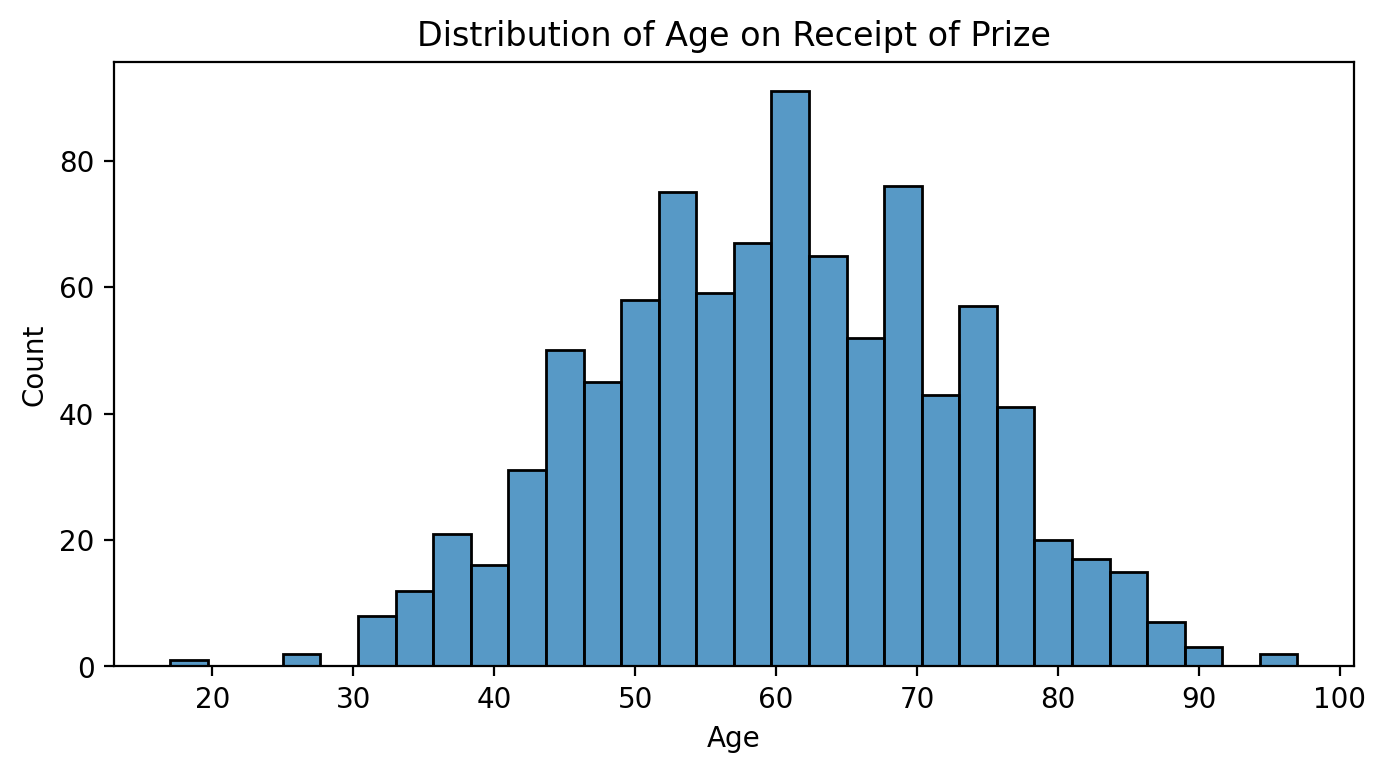

In [295]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

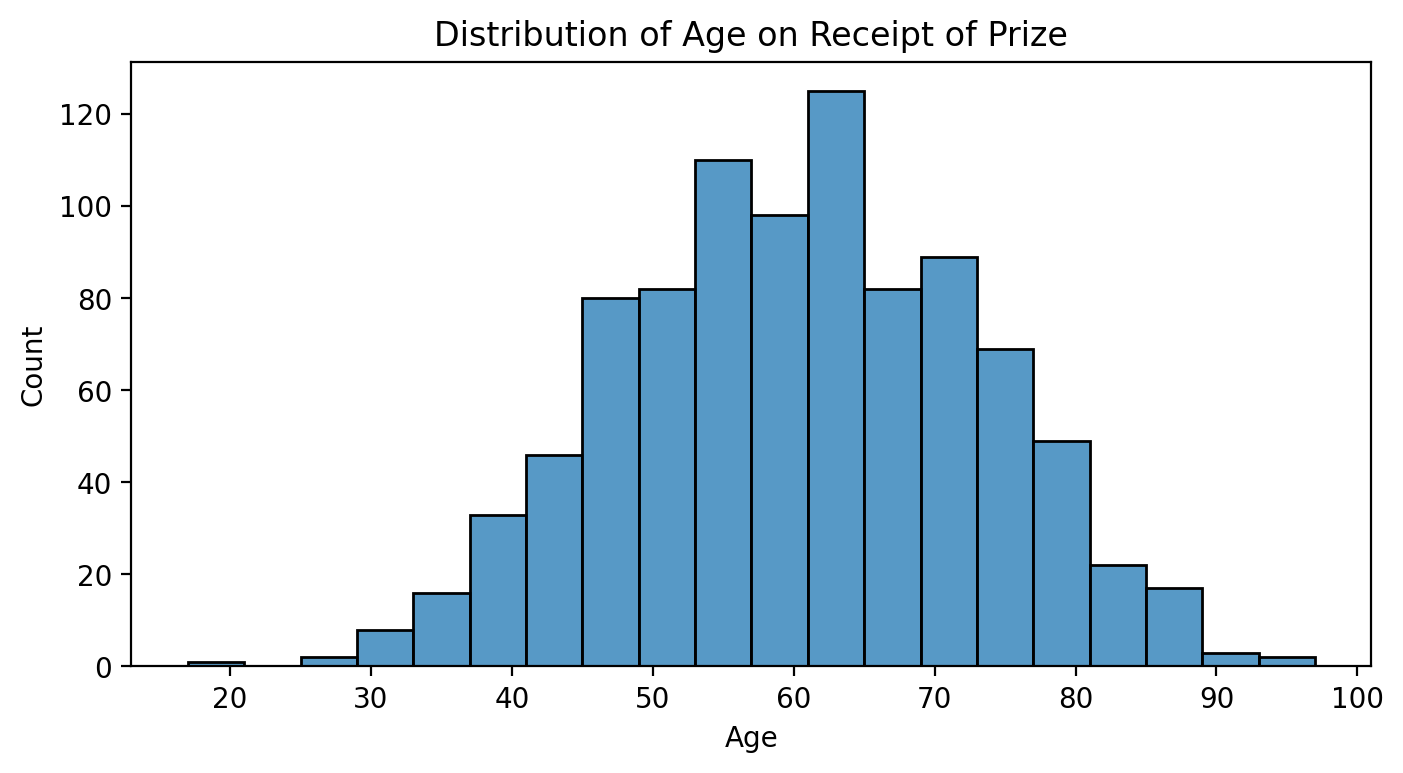

In [294]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


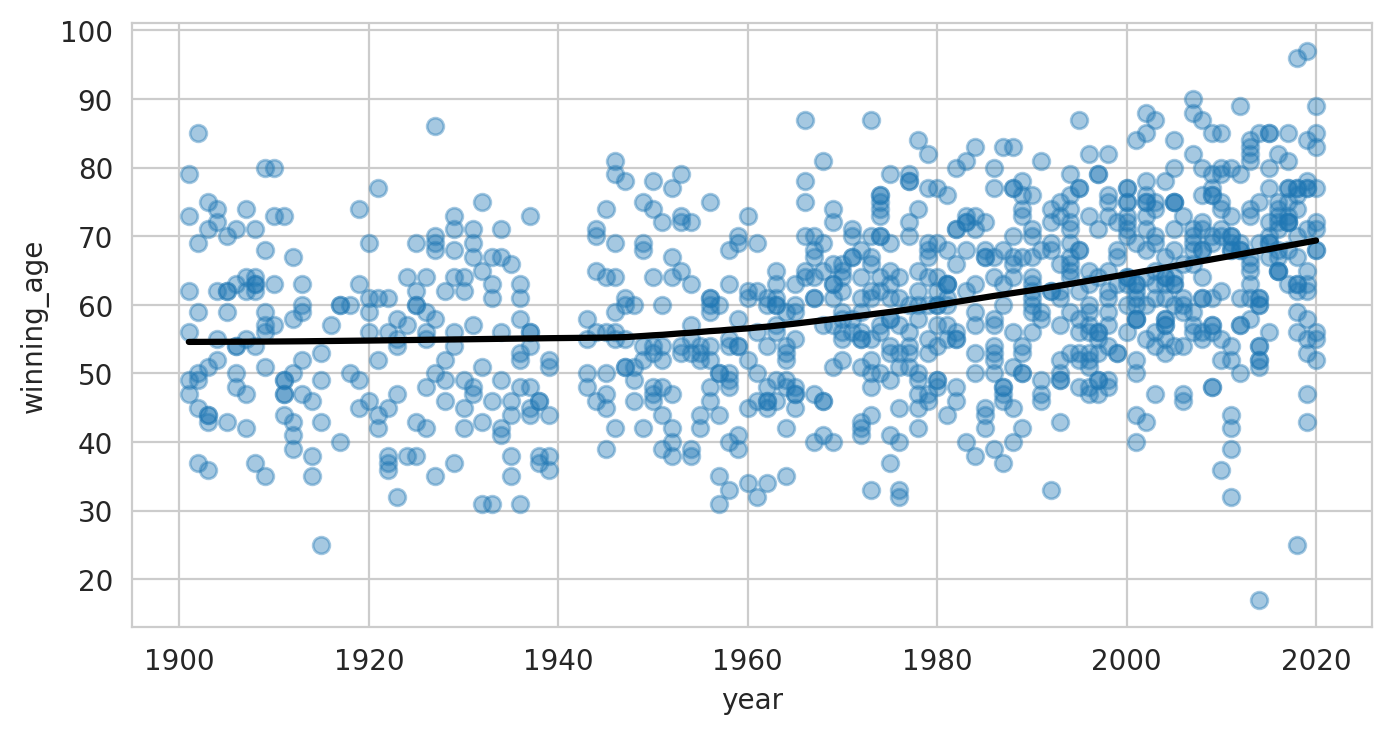

In [298]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

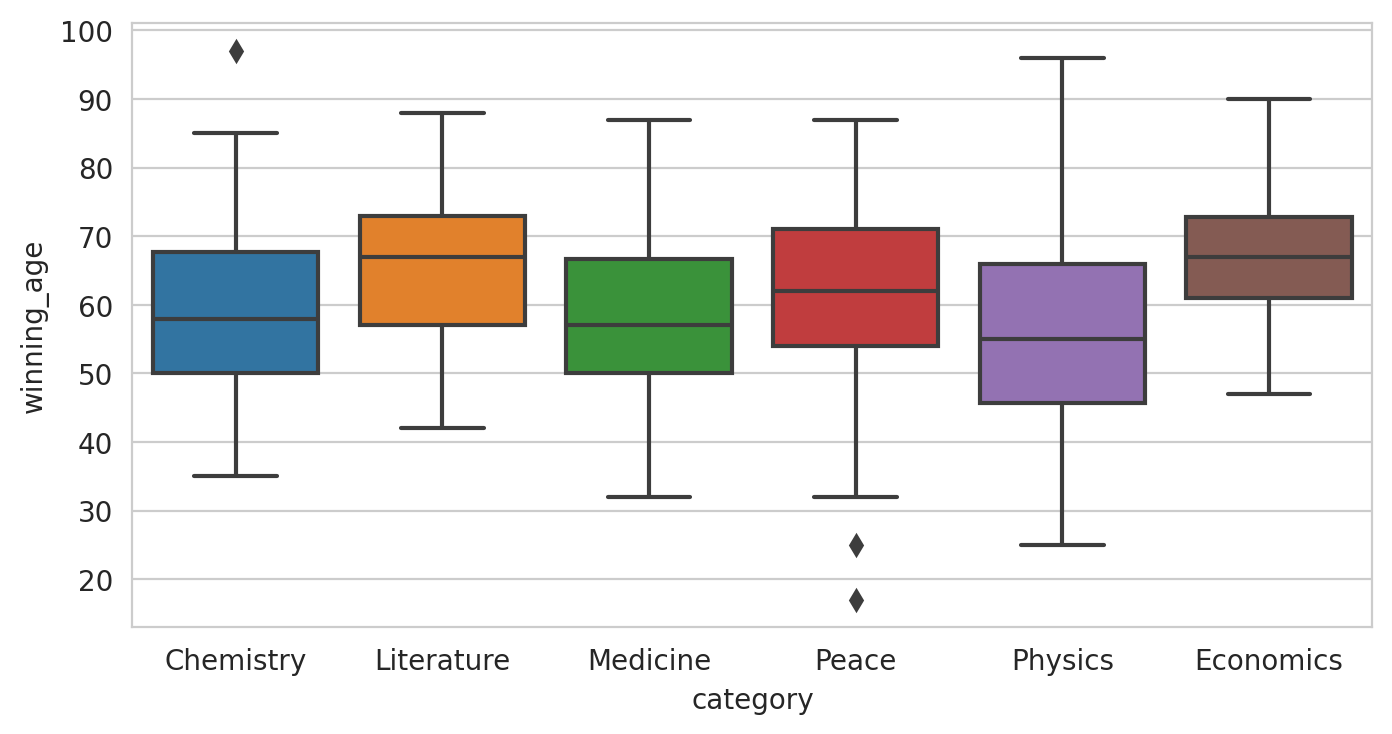

In [299]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


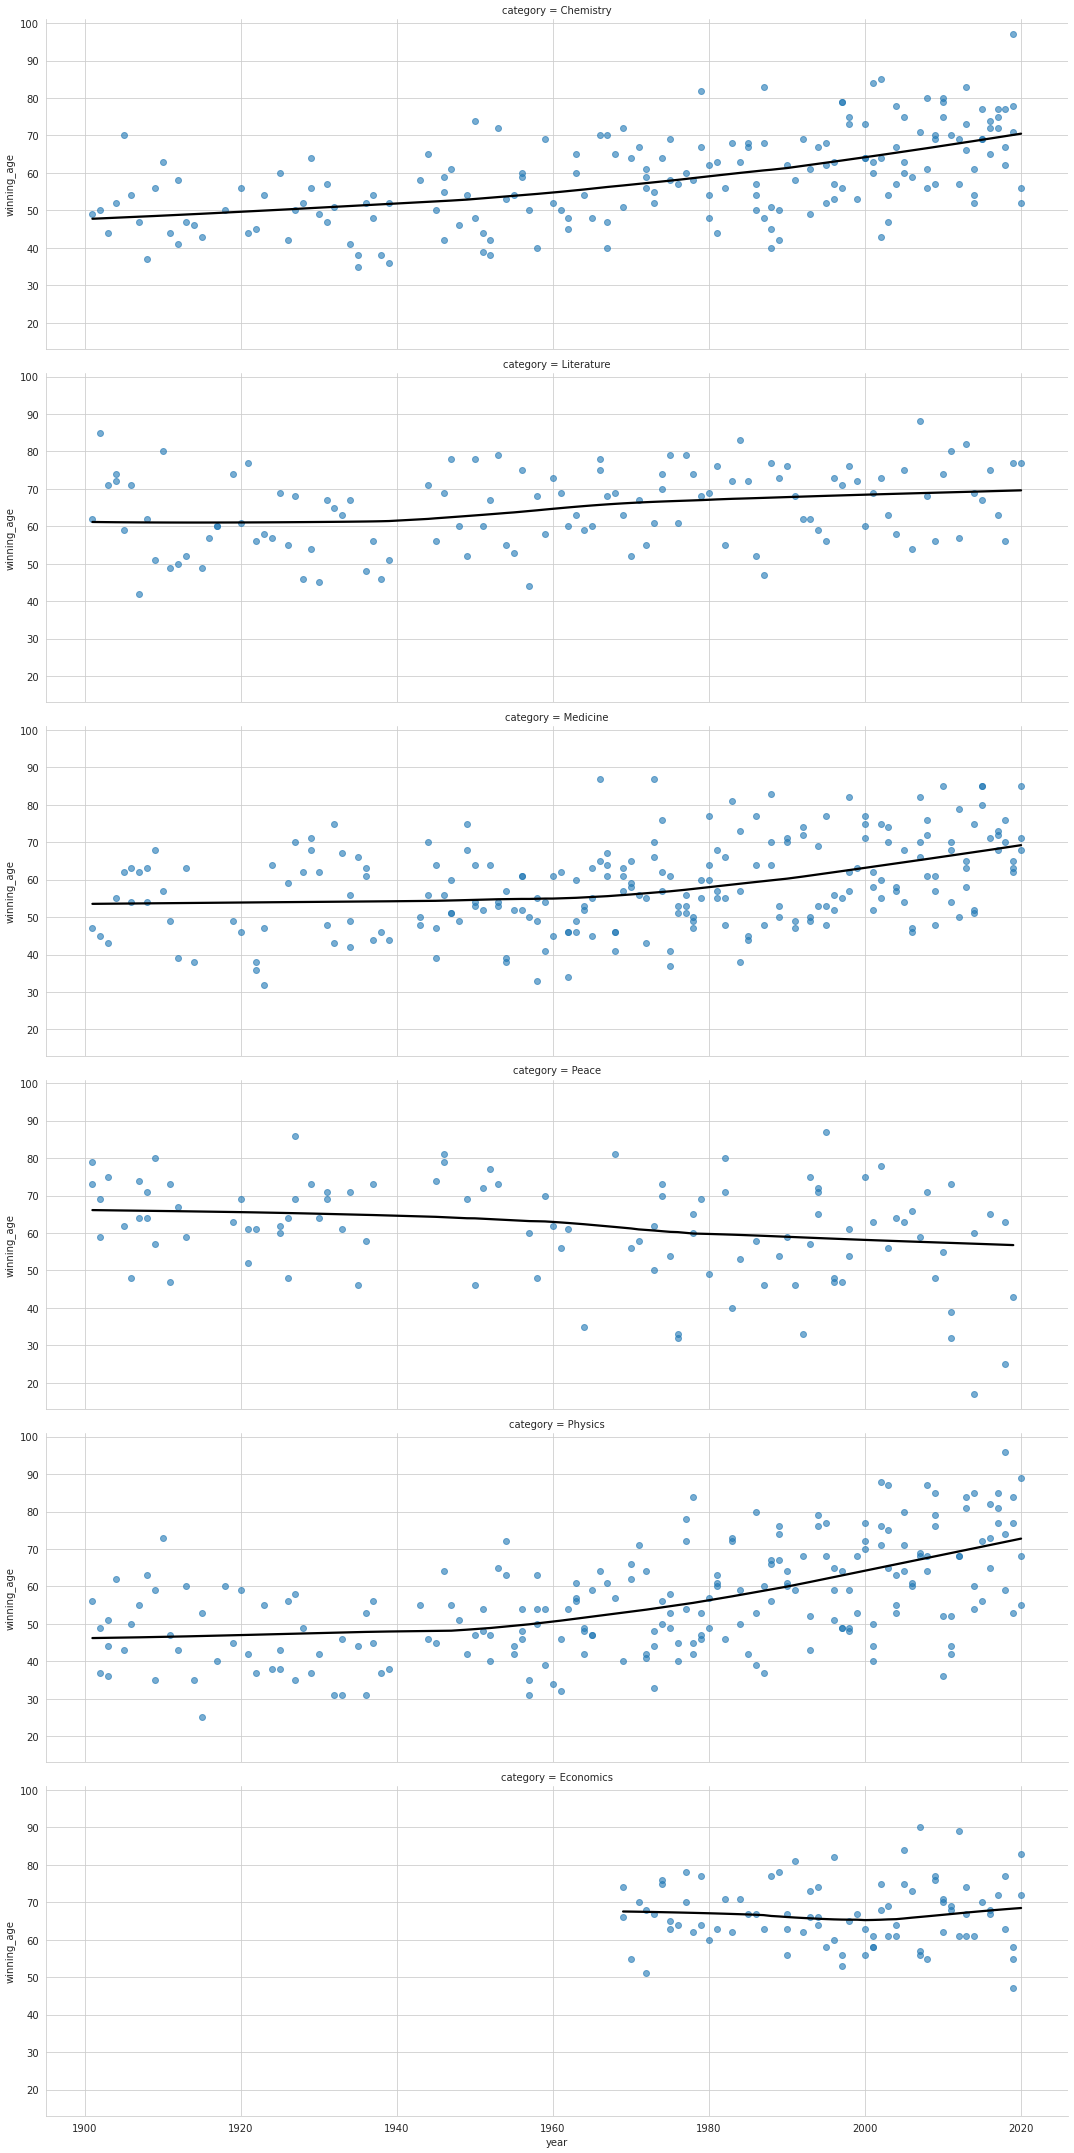

In [304]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=3,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
plt.show()

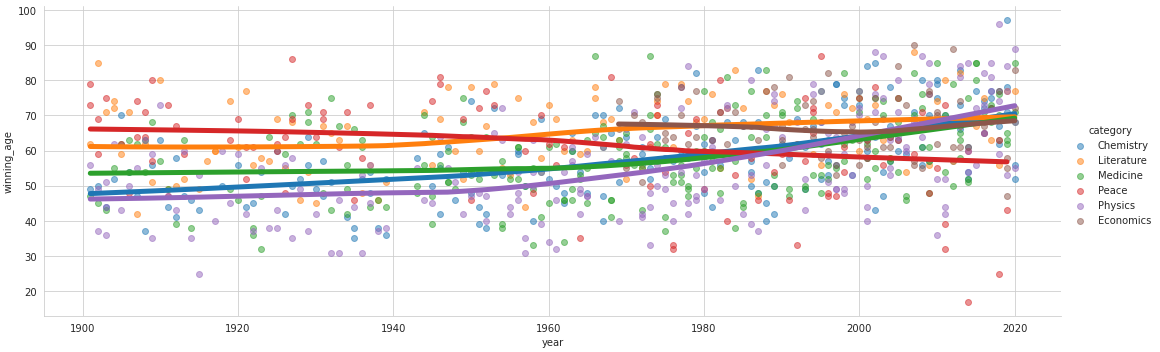

In [303]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=3,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
plt.show()